### Imports and prelims

In [48]:
from credentials import user, password, server
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [49]:
engine = create_engine("postgres+psycopg2://"+user+":"+password+"@"+server+":5432/covid_data")

In [50]:
colleges_df = pd.read_sql("SELECT * FROM colleges;", con=engine)
counties_df = pd.read_sql("SELECT * FROM counties;", con=engine)
mask_use_df = pd.read_sql("SELECT * FROM mask_use;", con=engine)
states_df = pd.read_sql("SELECT * FROM states;", con=engine)
us_totals_df = pd.read_sql("SELECT * FROM us_totals;", con=engine)

In [11]:
businesses_df = pd.read_csv('../data/businesses.csv')

In [12]:
clusters_df = pd.read_csv('../data/clusters.csv')

In [18]:
hub_nash_df = pd.read_csv('../data/hubNashville__311__Service_Requests.csv', low_memory=False)

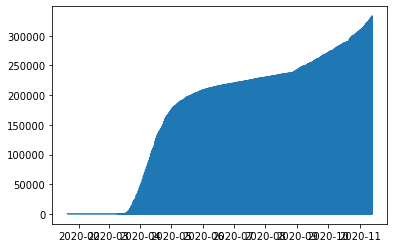

In [36]:
counties_df
plt.plot(counties_df['date'], counties_df['cases'])

In [41]:
c191 = hub_nash_df[hub_nash_df['Request Type'] == 'COVID-19']
c192 = c191[c191['Subrequest Type'] == 'COVID-19 Violations']
c192
plt.plot(c192['Date / Time Opened'], c192[''])

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
61,346122,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
95,339374,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)"
110,343513,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
113,442996,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
118,339423,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324870,501190,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,11/12/2020 06:12:35 PM,11/13/2020 03:30:57 PM,Phone,NaN,NaN,...,False,NaN,False,3201 Old Hickory Blvd,OLD HICKORY,11.0,37138,36.244860,-86.637270,"(36.24486, -86.63727)"
324943,502791,New,COVID-19,COVID-19 Violations,COVID-19 Violations,11/13/2020 10:09:18 PM,NaN,hubNashville Community,NaN,NaN,...,False,NaN,False,306 11th Ave S,NASHVILLE,19.0,37203,36.153774,-86.783990,"(36.1537745, -86.7839901)"
325263,502933,New,COVID-19,COVID-19 Violations,COVID-19 Violations,11/14/2020 01:23:18 AM,NaN,hubNashville Community,NaN,NaN,...,False,NaN,False,121 17th Ave S,NASHVILLE,19.0,37203,36.151999,-86.793587,"(36.151999000539355, -86.7935866592785)"
325383,501297,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,11/12/2020 07:15:46 PM,11/13/2020 03:37:21 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,515 Bell Rd,ANTIOCH,32.0,37013,36.071121,-86.637056,"(36.0711212, -86.6370555)"


In [47]:
hub_nash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486496 entries, 0 to 486495
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Request #                   486496 non-null  int64  
 1   Status                      486496 non-null  object 
 2   Request Type                486164 non-null  object 
 3   Subrequest Type             483005 non-null  object 
 4   Additional Subrequest Type  482625 non-null  object 
 5   Date / Time Opened          486496 non-null  object 
 6   Date / Time Closed          475795 non-null  object 
 7   Request Origin              486496 non-null  object 
 8   System of Origin ID         29269 non-null   object 
 9   Contact Type                27479 non-null   object 
 10  Preferred Language          0 non-null       float64
 11  State Issue                 486496 non-null  bool   
 12  Parent Request              5183 non-null    float64
 13  Closed When Cr

In [ ]:
.to_datetime()

### Question 3